# Exercício: K-means
- Vamos utilizar o K-means no dataset abaixo:
    - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits
    - É um dataset de dígitos escritos a mão, onde cada registro é uma imagem 8x8 de um dígito 
- **Exercício:**
    - Utilize o K-means para criar clusters desses dados
    - Utilize o "Método do Cotovelo" para determinar o número ideal de k
    - Compare o valor encontrado acima com a quantidade de classes do dataset
    - Faça os ajustes necessários para melhor agrupar os dados
- **Dicas:**
    - Os targets podem ser obtidos em **digits.target**
    - Você pode utilizar o `.pivot_table` para visualizar melhor a relação entre as classes e os clusters gerados pelo K-means
        - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html
    - Para melhorar ainda mais a visualização, também é possível utilizar o `.heatmap` do seaborn
        - https://seaborn.pydata.org/generated/seaborn.heatmap.html
    - Como teste, você pode tentar considerar 2 clusters para representar uma única classe

In [1]:
# Importando o dataset
from sklearn.datasets import load_digits
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

<Figure size 432x288 with 0 Axes>

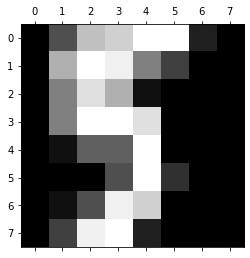

In [4]:
# Visualizando um dígito
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[15])
plt.show()

In [5]:
# Transformando em um DataFrame
import pandas as pd
digitos = pd.DataFrame(digits.data,columns=digits.feature_names)
digitos.head(3)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0


- **Utilizando o K-means**
    - https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html